In [0]:
%matplotlib inline
import seaborn
import numpy, scipy, scipy.spatial, matplotlib.pyplot as plt
import librosa
plt.rcParams['figure.figsize'] = (14, 3)

In [0]:
x = [0, 3, 5, 2, 0, -4, -4, 0]
y = [1, 3, 4, 3, 1, -1, -2, -1, 0]
nx = len(x)
ny = len(y)


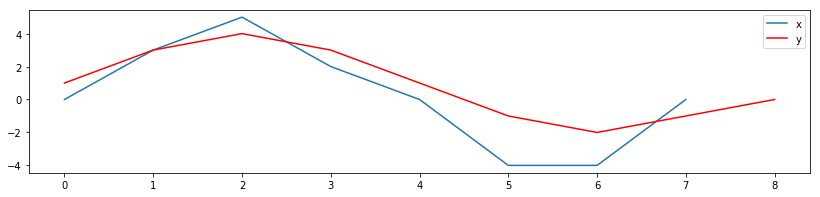

In [3]:
plt.plot(x)
plt.plot(y, c='r')
plt.legend(('x', 'y'))

In [0]:
def dtw_table(x, y):
    nx = len(x)
    ny = len(y)
    table = numpy.zeros((nx+1, ny+1))
    
    # Compute left column separately, i.e. j=0.
    table[1:, 0] = numpy.inf
        
    # Compute top row separately, i.e. i=0.
    table[0, 1:] = numpy.inf
        
    # Fill in the rest.
    for i in range(1, nx+1):
        for j in range(1, ny+1):
            d = scipy.spatial.distance.euclidean(x[i-1], y[j-1])
            table[i, j] = d + min(table[i-1, j], table[i, j-1], table[i-1, j-1])
    return table

In [0]:
table = dtw_table(x, y)


In [6]:
print(table)

[[ 0. inf inf inf inf inf inf inf inf inf]
 [inf  1.  4.  8. 11. 12. 13. 15. 16. 16.]
 [inf  3.  1.  2.  2.  4.  8. 13. 17. 19.]
 [inf  7.  3.  2.  4.  6. 10. 15. 19. 22.]
 [inf  8.  4.  4.  3.  4.  7. 11. 14. 16.]
 [inf  9.  7.  8.  6.  4.  5.  7.  8.  8.]
 [inf 14. 14. 15. 13.  9.  7.  7. 10. 12.]
 [inf 19. 21. 22. 20. 14. 10.  9. 10. 14.]
 [inf 20. 22. 25. 23. 15. 11. 11. 10. 10.]]


In [0]:
def dtw(x, y, table):
    i = len(x)
    j = len(y)
    path = [(i, j)]
    while i > 0 or j > 0:
        minval = numpy.inf
        if table[i-1, j] < minval:
            minval = table[i-1, j]
            step = (i-1, j)
        if table[i][j-1] < minval:
            minval = table[i, j-1]
            step = (i, j-1)
        if table[i-1][j-1] < minval:
            minval = table[i-1, j-1]
            step = (i-1, j-1)
        path.insert(0, step)
        i, j = step
    return path

In [8]:
path = dtw(x, y, table)
path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (5, 6),
 (6, 7),
 (7, 7),
 (8, 8),
 (8, 9)]

In [9]:
sum(abs(x[i-1] - y[j-1]) for (i, j) in path if i >= 0 and j >= 0)


10